Encoding tamamlandı.
NaN temizlendi.


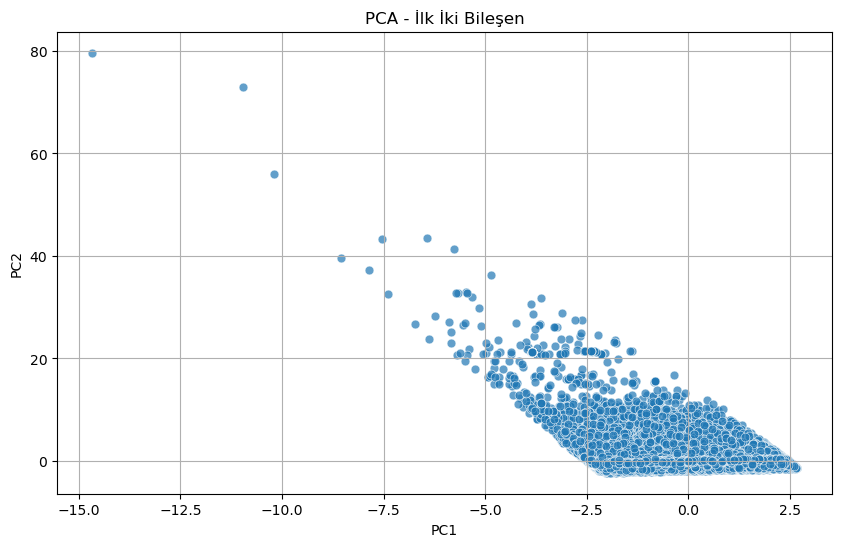

Explained Variance Ratio: [0.2320553  0.20405046]


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Load CSV file
df = pd.read_csv("C:/Users/karm1/OneDrive/Desktop/Upwork_Project/data/all_upwork_jobs_2024-02-07-2024-03-24.csv")

# Make a copy
encoded_df = df.copy()

# -------------------------------------
# 1. Label Encoding for ALL object columns
# -------------------------------------
label_encoders = {}

for col in encoded_df.columns:
    if encoded_df[col].dtype == "object":
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
        label_encoders[col] = le

print("Encoding tamamlandı.")

# -------------------------------------
# 2. Replace ALL NaN with column mean
# -------------------------------------
encoded_df = encoded_df.fillna(encoded_df.mean(numeric_only=True))

print("NaN temizlendi.")

# -------------------------------------
# 3. Standardize
# -------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df)

# -------------------------------------
# 4. PCA
# -------------------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

# -------------------------------------
# 5. PC1 vs PC2 Scatter Plot
# -------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", s=40, alpha=0.7)
plt.title("PCA - İlk İki Bileşen")
plt.grid(True)
plt.show()

# -------------------------------------
# 6. Explained Variance Ratio
# -------------------------------------
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
